In [1]:
import math
import pandas as pd
import tensorflow as tf
import os
import numpy as np
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,precision_score,recall_score,recall_score,accuracy_score,f1_score
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.models import load_model

In [2]:
physical_devices = tf.config.list_physical_devices('GPU') 
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)

In [3]:
print(physical_devices)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
Bug_id1 = "531755"
attribute = "EC"

In [11]:
days_range = [x for x in range(1,31)] + [x for x in range(100,127)]
FM_data = pd.read_csv('./dataset/toy_train/FM/531755/EC/day {}.csv'.format(1))
print(FM_data.shape)

(70, 331)


In [7]:
FM_data = pd.read_csv('./dataset/toy_train/FM/531755/EC/day {}.csv'.format(1))
# for i in range(1,127):
for i in days_range:
    data = pd.read_csv('./dataset/toy_train/FM/531755/EC/day {}.csv'.format(i))
    FM_data = FM_data.append(data)




<ipython-input-7-990636e22526>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  FM_data = FM_data.append(data)
<ipython-input-7-990636e22526>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  FM_data = FM_data.append(data)
<ipython-input-7-990636e22526>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  FM_data = FM_data.append(data)
<ipython-input-7-990636e22526>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  FM_data = FM_data.append(data)
<ipython-input-7-990636e22526>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  FM_data = FM_data.append(data)


In [8]:
print(FM_data.shape)
X=FM_data.to_numpy()

(4060, 331)


In [12]:
# Y = [0]*6300 + [1]*1701
Y = [0]*2100 + [1]*1960
Y = np.array(Y)
Y.shape

(4060,)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

In [14]:
msle = MeanSquaredLogarithmicError()

In [15]:
classifier = Sequential()
classifier.add(Dense(units = 331, activation = 'relu', input_dim = 331))
classifier.add(Dense(units = 480, activation = 'relu'))
classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

classifier.compile(optimizer = 'Adam', loss ='binary_crossentropy', metrics=[msle,'accuracy'])




In [16]:
history = classifier.fit(X_train, y_train, batch_size = 64, epochs = 500,validation_split=0.2)

Epoch 1/500
34/34 [==============================] - 1s 8ms/step - loss: 3.1958 - mean_squared_logarithmic_error: 0.1893 - accuracy: 0.5332 - val_loss: 1.5492 - val_mean_squared_logarithmic_error: 0.1711 - val_accuracy: 0.5129
Epoch 2/500
34/34 [==============================] - 0s 4ms/step - loss: 0.9112 - mean_squared_logarithmic_error: 0.1238 - accuracy: 0.6163 - val_loss: 1.0228 - val_mean_squared_logarithmic_error: 0.1403 - val_accuracy: 0.5515
Epoch 3/500
34/34 [==============================] - 0s 4ms/step - loss: 0.7109 - mean_squared_logarithmic_error: 0.1096 - accuracy: 0.6668 - val_loss: 0.6959 - val_mean_squared_logarithmic_error: 0.1155 - val_accuracy: 0.6287
Epoch 4/500
34/34 [==============================] - 0s 4ms/step - loss: 0.5924 - mean_squared_logarithmic_error: 0.0946 - accuracy: 0.7277 - val_loss: 0.6430 - val_mean_squared_logarithmic_error: 0.0992 - val_accuracy: 0.6654
Epoch 5/500
34/34 [==============================] - 0s 4ms/step - loss: 0.5858 - mean_squar

In [17]:
history.history.keys()

dict_keys(['loss', 'mean_squared_logarithmic_error', 'accuracy', 'val_loss', 'val_mean_squared_logarithmic_error', 'val_accuracy'])

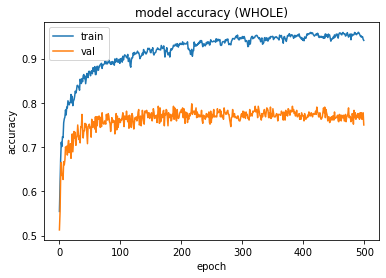

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy ({})'.format("WHOLE"))
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

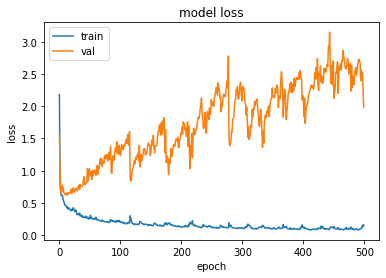

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [20]:
predicted = classifier.predict_classes(X_test)


/home/harsh/anaconda3/envs/tf_gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [21]:
predicted

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [22]:


print('confusion_matrix:\n', confusion_matrix(y_test, predicted))
print('Precision: %.3f' % precision_score(y_test, predicted))
print('Recall: %.3f' % recall_score(y_test, predicted))
print('F1: %.3f' % f1_score(y_test, predicted))
print('Accuracy: %.3f' % accuracy_score(y_test, predicted))

confusion_matrix:
 [[566 130]
 [140 504]]
Precision: 0.795
Recall: 0.783
F1: 0.789
Accuracy: 0.799


In [ ]:
confusion_matrix:  [[479 152]
 [142 433]]
Precision: 0.740
Recall: 0.753
F1: 0.747
Accuracy: 0.756

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 331)               109892    
_________________________________________________________________
dense_33 (Dense)             (None, 480)               159360    
_________________________________________________________________
dense_34 (Dense)             (None, 256)               123136    
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 257       
Total params: 392,645
Trainable params: 392,645
Non-trainable params: 0
_________________________________________________________________
None


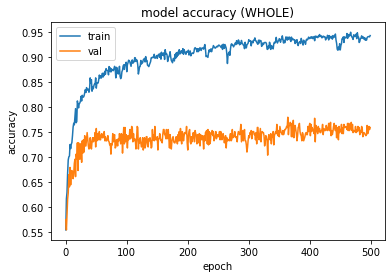

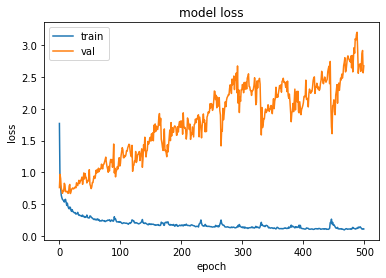

confusion_matrix:
 [[449 158]
 [138 461]]
Precision: 0.745
Recall: 0.770
F1: 0.757
Accuracy: 0.755


In [95]:
# model 1


classifier = Sequential()
classifier.add(Dense(units = 331, activation = 'relu', input_dim = 331))
classifier.add(Dense(units = 480, activation = 'relu'))
classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

classifier.compile(optimizer = 'Adam', loss ='binary_crossentropy', metrics=[msle,'accuracy'])

print(classifier.summary())

history = classifier.fit(X_train, y_train, batch_size = 64, epochs = 500,validation_split=0.2,verbose=0)


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy ({})'.format("WHOLE"))
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


predicted_results = classifier.predict(X_test)
predicted = (predicted_results > 0.5).astype("int32")

print('confusion_matrix:\n', confusion_matrix(y_test, predicted))
print('Precision: %.3f' % precision_score(y_test, predicted))
print('Recall: %.3f' % recall_score(y_test, predicted))
print('F1: %.3f' % f1_score(y_test, predicted))
print('Accuracy: %.3f' % accuracy_score(y_test, predicted))

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 1)                 332       
Total params: 332
Trainable params: 332
Non-trainable params: 0
_________________________________________________________________
None


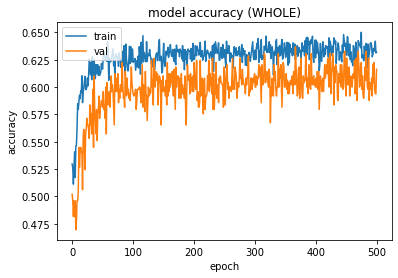

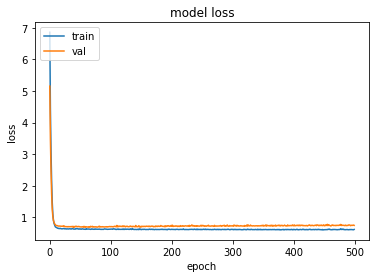

confusion_matrix:
 [[438 169]
 [334 265]]
Precision: 0.611
Recall: 0.442
F1: 0.513
Accuracy: 0.583


In [97]:
# model 2


classifier = Sequential()
classifier.add(Dense(units = 1, activation = 'sigmoid', input_dim = 331))
# classifier.add(Dense(units = 480, activation = 'relu'))
# classifier.add(Dense(units = 256, activation = 'relu'))
# classifier.add(Dense(units = 1, activation = 'sigmoid'))

classifier.compile(optimizer = 'Adam', loss ='binary_crossentropy', metrics=[msle,'accuracy'])

print(classifier.summary())

history = classifier.fit(X_train, y_train, batch_size = 64, epochs = 500,validation_split=0.2,verbose=0)


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy ({})'.format("WHOLE"))
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


predicted_results = classifier.predict(X_test)
predicted = (predicted_results > 0.5).astype("int32")

print('confusion_matrix:\n', confusion_matrix(y_test, predicted))
print('Precision: %.3f' % precision_score(y_test, predicted))
print('Recall: %.3f' % recall_score(y_test, predicted))
print('F1: %.3f' % f1_score(y_test, predicted))
print('Accuracy: %.3f' % accuracy_score(y_test, predicted))

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 480)               159360    
_________________________________________________________________
dense_39 (Dense)             (None, 560)               269360    
_________________________________________________________________
dense_40 (Dense)             (None, 320)               179520    
_________________________________________________________________
dense_41 (Dense)             (None, 256)               82176     
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 257       
Total params: 690,673
Trainable params: 690,673
Non-trainable params: 0
_________________________________________________________________
None


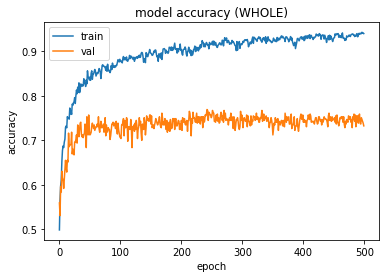

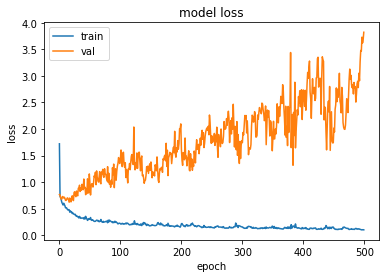

confusion_matrix:
 [[462 145]
 [151 448]]
Precision: 0.755
Recall: 0.748
F1: 0.752
Accuracy: 0.755


In [98]:
# model 3


classifier = Sequential()
classifier.add(Dense(units = 480, activation = 'relu', input_dim = 331))
classifier.add(Dense(units = 560, activation = 'relu'))
classifier.add(Dense(units = 320, activation = 'relu'))
classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

classifier.compile(optimizer = 'Adam', loss ='binary_crossentropy', metrics=[msle,'accuracy'])

print(classifier.summary())

history = classifier.fit(X_train, y_train, batch_size = 64, epochs = 500,validation_split=0.2,verbose=0)


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy ({})'.format("WHOLE"))
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


predicted_results = classifier.predict(X_test)
predicted = (predicted_results > 0.5).astype("int32")

print('confusion_matrix:\n', confusion_matrix(y_test, predicted))
print('Precision: %.3f' % precision_score(y_test, predicted))
print('Recall: %.3f' % recall_score(y_test, predicted))
print('F1: %.3f' % f1_score(y_test, predicted))
print('Accuracy: %.3f' % accuracy_score(y_test, predicted))

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 480)               159360    
_________________________________________________________________
dense_52 (Dense)             (None, 320)               153920    
_________________________________________________________________
dense_53 (Dense)             (None, 256)               82176     
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 257       
Total params: 395,713
Trainable params: 395,713
Non-trainable params: 0
_________________________________________________________________
None


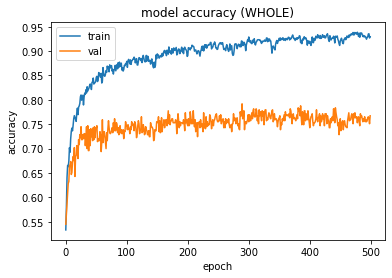

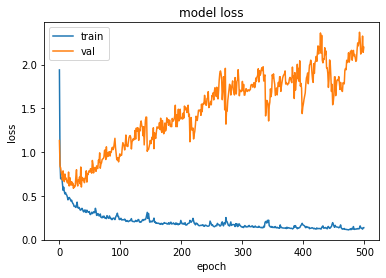

confusion_matrix:
 [[460 147]
 [157 442]]
Precision: 0.750
Recall: 0.738
F1: 0.744
Accuracy: 0.748


In [101]:
# model 4


classifier = Sequential()
classifier.add(Dense(units = 480, activation = 'relu', input_dim = 331))
classifier.add(Dense(units = 320, activation = 'relu'))
classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

classifier.compile(optimizer = 'Adam', loss ='binary_crossentropy', metrics=[msle,'accuracy'])

print(classifier.summary())

history = classifier.fit(X_train, y_train, batch_size = 64, epochs = 500,validation_split=0.2,verbose=0)


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy ({})'.format("WHOLE"))
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


predicted_results = classifier.predict(X_test)
predicted = (predicted_results > 0.5).astype("int32")

print('confusion_matrix:\n', confusion_matrix(y_test, predicted))
print('Precision: %.3f' % precision_score(y_test, predicted))
print('Recall: %.3f' % recall_score(y_test, predicted))
print('F1: %.3f' % f1_score(y_test, predicted))
print('Accuracy: %.3f' % accuracy_score(y_test, predicted))

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 180)               59760     
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 181       
Total params: 59,941
Trainable params: 59,941
Non-trainable params: 0
_________________________________________________________________
None


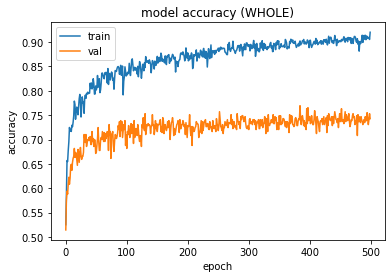

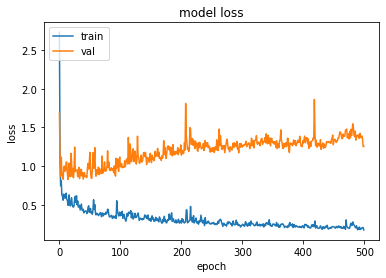

confusion_matrix:
 [[464 143]
 [149 450]]
Precision: 0.759
Recall: 0.751
F1: 0.755
Accuracy: 0.758


In [102]:
# model 5


classifier = Sequential()
classifier.add(Dense(units = 180, activation = 'relu', input_dim = 331))
# classifier.add(Dense(units = 320, activation = 'relu'))
# classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

classifier.compile(optimizer = 'Adam', loss ='binary_crossentropy', metrics=[msle,'accuracy'])

print(classifier.summary())

history = classifier.fit(X_train, y_train, batch_size = 64, epochs = 500,validation_split=0.2,verbose=0)


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy ({})'.format("WHOLE"))
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


predicted_results = classifier.predict(X_test)
predicted = (predicted_results > 0.5).astype("int32")

print('confusion_matrix:\n', confusion_matrix(y_test, predicted))
print('Precision: %.3f' % precision_score(y_test, predicted))
print('Recall: %.3f' % recall_score(y_test, predicted))
print('F1: %.3f' % f1_score(y_test, predicted))
print('Accuracy: %.3f' % accuracy_score(y_test, predicted))

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 680)               225760    
_________________________________________________________________
dense_58 (Dense)             (None, 520)               354120    
_________________________________________________________________
dense_59 (Dense)             (None, 480)               250080    
_________________________________________________________________
dense_60 (Dense)             (None, 320)               153920    
_________________________________________________________________
dense_61 (Dense)             (None, 256)               82176     
_________________________________________________________________
dense_62 (Dense)             (None, 1)                 257       
Total params: 1,066,313
Trainable params: 1,066,313
Non-trainable params: 0
___________________________________________

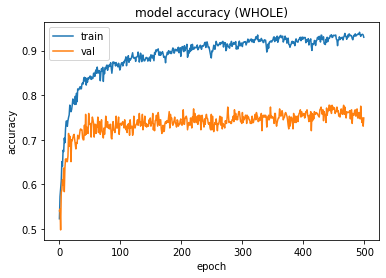

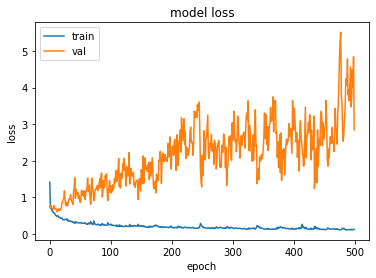

confusion_matrix:
 [[466 141]
 [158 441]]
Precision: 0.758
Recall: 0.736
F1: 0.747
Accuracy: 0.752


In [103]:
# model 6


classifier = Sequential()
classifier.add(Dense(units = 680, activation = 'relu', input_dim = 331))
classifier.add(Dense(units = 520, activation = 'relu'))
classifier.add(Dense(units = 480, activation = 'relu'))
classifier.add(Dense(units = 320, activation = 'relu'))
classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

classifier.compile(optimizer = 'Adam', loss ='binary_crossentropy', metrics=[msle,'accuracy'])

print(classifier.summary())

history = classifier.fit(X_train, y_train, batch_size = 64, epochs = 500,validation_split=0.2,verbose=0)


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy ({})'.format("WHOLE"))
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


predicted_results = classifier.predict(X_test)
predicted = (predicted_results > 0.5).astype("int32")

print('confusion_matrix:\n', confusion_matrix(y_test, predicted))
print('Precision: %.3f' % precision_score(y_test, predicted))
print('Recall: %.3f' % recall_score(y_test, predicted))
print('F1: %.3f' % f1_score(y_test, predicted))
print('Accuracy: %.3f' % accuracy_score(y_test, predicted))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 480)               159360    
_________________________________________________________________
dense_9 (Dense)              (None, 320)               153920    
_________________________________________________________________
dense_10 (Dense)             (None, 256)               82176     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 257       
Total params: 395,713
Trainable params: 395,713
Non-trainable params: 0
_________________________________________________________________
None


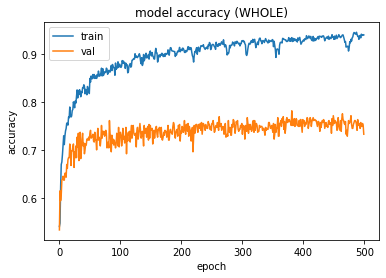

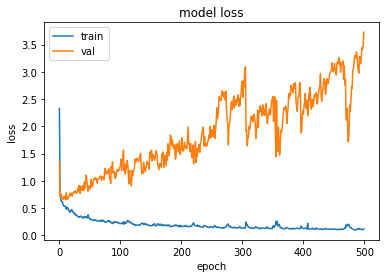

confusion_matrix:
 [[496 138]
 [152 420]]
Precision: 0.753
Recall: 0.734
F1: 0.743
Accuracy: 0.760


In [12]:
# model 7


classifier = Sequential()
classifier.add(Dense(units = 480, activation = 'relu', input_dim = 331))
classifier.add(Dense(units = 320, activation = 'relu'))
classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

classifier.compile(optimizer = 'Adam', loss ='binary_crossentropy', metrics=[msle,'accuracy'])

print(classifier.summary())

history = classifier.fit(X_train, y_train, batch_size = 64, epochs = 500,validation_split=0.2,verbose=0)


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy ({})'.format("WHOLE"))
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


predicted_results = classifier.predict(X_test)
predicted = (predicted_results > 0.5).astype("int32")

print('confusion_matrix:\n', confusion_matrix(y_test, predicted))
print('Precision: %.3f' % precision_score(y_test, predicted))
print('Recall: %.3f' % recall_score(y_test, predicted))
print('F1: %.3f' % f1_score(y_test, predicted))
print('Accuracy: %.3f' % accuracy_score(y_test, predicted))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 5)                 1660      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 6         
Total params: 1,666
Trainable params: 1,666
Non-trainable params: 0
_________________________________________________________________
None


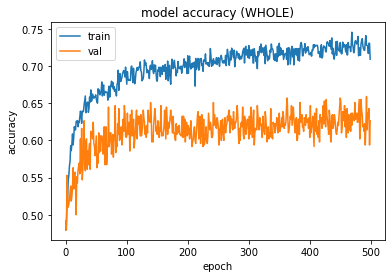

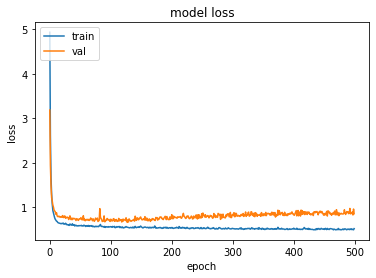

confusion_matrix:
 [[474 159]
 [259 314]]
Precision: 0.664
Recall: 0.548
F1: 0.600
Accuracy: 0.653


In [14]:
# model 8


classifier = Sequential()
classifier.add(Dense(units = 5, activation = 'relu', input_dim = 331))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

classifier.compile(optimizer = 'Adam', loss ='binary_crossentropy', metrics=[msle,'accuracy'])

print(classifier.summary())

history = classifier.fit(X_train, y_train, batch_size = 64, epochs = 500,validation_split=0.2,verbose=0)


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy ({})'.format("WHOLE"))
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


predicted_results = classifier.predict(X_test)
predicted = (predicted_results > 0.5).astype("int32")

print('confusion_matrix:\n', confusion_matrix(y_test, predicted))
print('Precision: %.3f' % precision_score(y_test, predicted))
print('Recall: %.3f' % recall_score(y_test, predicted))
print('F1: %.3f' % f1_score(y_test, predicted))
print('Accuracy: %.3f' % accuracy_score(y_test, predicted))